# ANN & MNIST
---

## 라이브러리 불러오기

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # 표시하기 위한

import random as rd # 랜덤하게 이미지를 보기 위해서

from sklearn.metrics import accuracy_score # 정확도를 보기 위해서

- 손글씨 > 숫자를 손으로 쓴 이미지를 분류하는 문제
- MNIST >> DL에서 "Hello World!" 쯤 되는 친구 ㅋㅋ

## 데이터 불러오기

In [21]:
(train_x, train_y), (test_x, test_y) = keras.datasets.mnist.load_data() 
# 케라스에서 엠니스트라는 친구가 유명하다 보니까 기본적으로 제공을 해 줌 >> datasets.mnist
# 저절로 불러와줌

In [22]:
# 사이즈를 보면 너무 많음..
train_x.shape, train_y.shape, test_x.shape, test_y.shape
# 3차원은 아니고 2차원임. 앞에 있는 60000은 데이터의 숫자로 따로 빼서 봐야하기 때문이다.


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

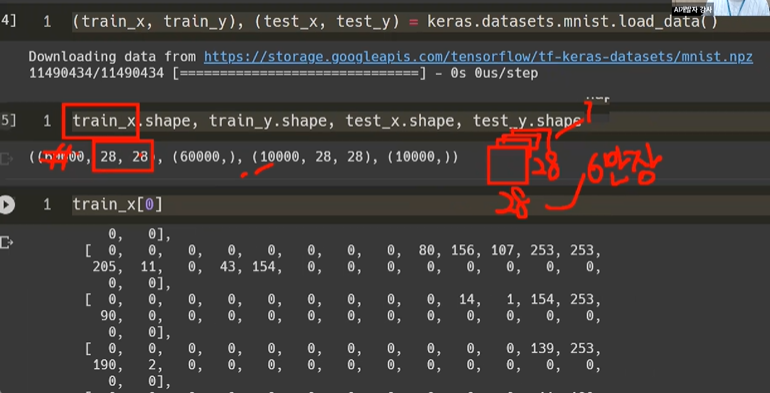

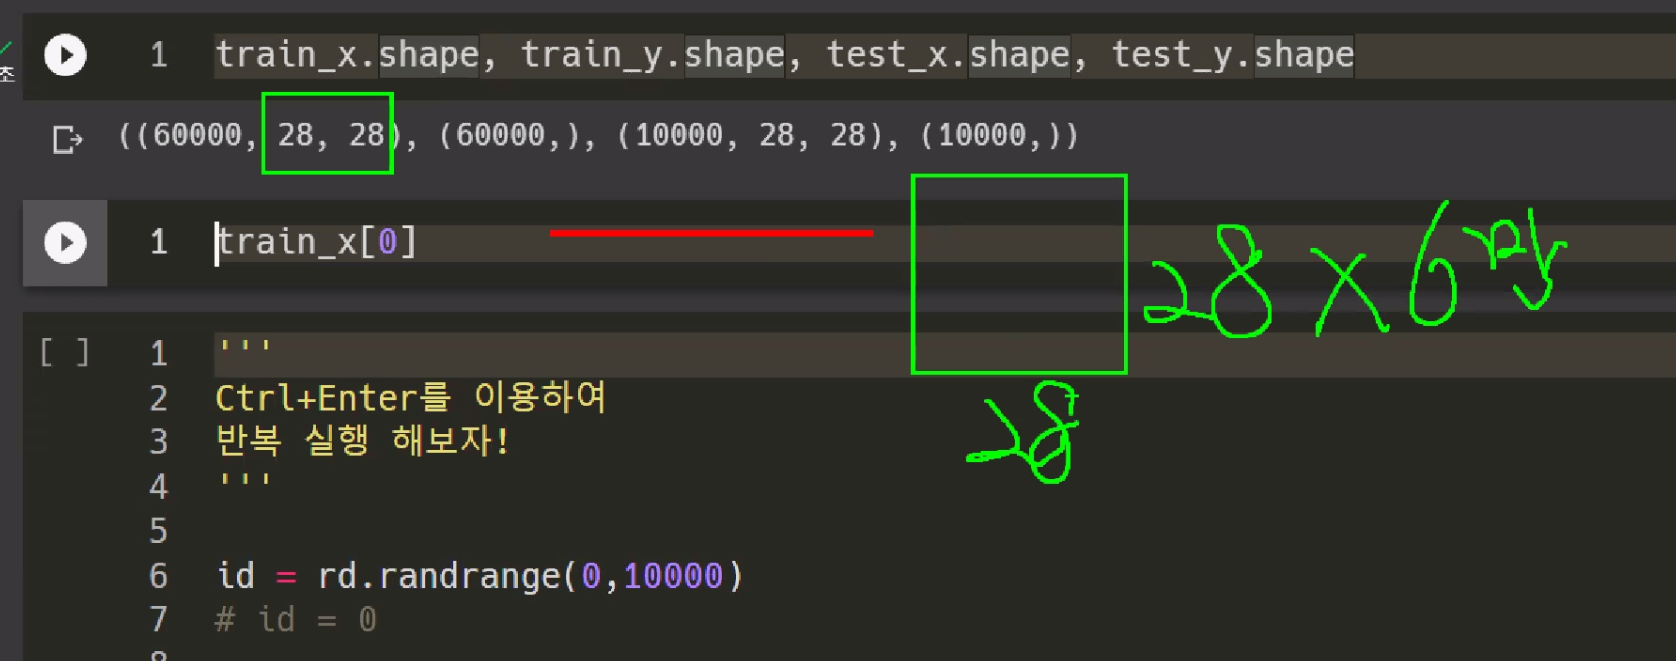

In [23]:
train_x[0]
# 트레인엑스의 첫번째 데이터가 뭔지 보여주고 있음 
# 실제로 이런 배열을 가지고 있고 28 바이 28 형태다라는 걸 알 수 있음.

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

id = 80
다음 그림은 숫자 9 입니다.


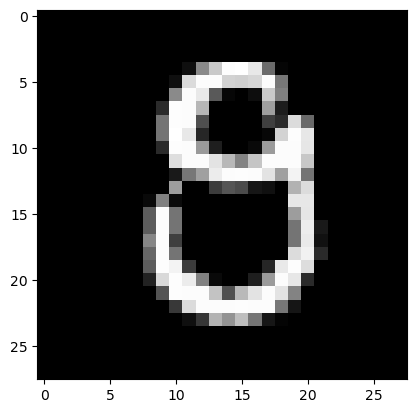

In [24]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)
# id = 0

print(f'id = {id}')
print(f'다음 그림은 숫자 {train_y[id]} 입니다.')

plt.imshow(train_x[id], cmap='gray')
plt.show()

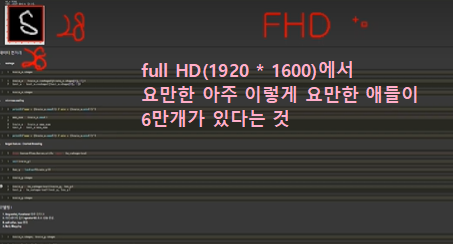

## 데이터 전처리

- 우리는 여태껏 (6000, 28) 이런 것만 봤지 (6000, 28, 28) 이런 건 본 적 업써 ㅠ
- 우리가 원하는 형태로 바꿔줄게!

* reshape

In [25]:
train_x.shape
# 데이터가 6만 장 있고, 가로세로 28 바이 28이라는 건데

(60000, 28, 28)

In [26]:
train_x = train_x.reshape([train_x.shape[0],-1]) # 차원을 변경하기 위해 리쉐이프
test_x = test_x.reshape([test_x.shape[0],-1])

In [27]:
train_x.shape

# 위에서 reshape를 적용하면 28x28 >> 784가 된다
# 어떻게 만들어진 걸까? 면이 선으로 펴졌음... 

(60000, 784)

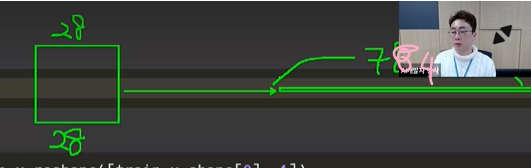

* min-max scaling

In [28]:
print(f'max : {train_x.max()} / min : {train_x.min()}') # 이미지 데이터에는 관습적으로 스케일링을 적용함

max : 255 / min : 0


In [19]:
# max_num = train_x.max()

# train_x = train_x/max_num
# test_x = test_x/max_num

In [29]:
# 조금 더 정확한 스케일링을 하자면?
max_n, min_n = train_x.max(), train_x.min()
max_n, min_n
# RGB 256이라 255가 최댓값

(255, 0)

In [30]:
train_x = (train_x - min_n) / (max_n - min_n)
test_x = (test_x - min_n) / (max_n - min_n) # 그런데 min이 0이라서 빼는 게 빼도 없기 때문에 위에 주석처리했던 코드를 그냥 사용했던 것이다??

In [31]:
print(f'max : {train_x.max()} / min : {train_x.min()}')

max : 1.0 / min : 0.0


* target feature : One-hot Encoding

In [32]:
train_y.shape # 다중분류 문제라 원핫인코딩이 필요함

(60000,)

In [33]:
from tensorflow.keras.utils import to_categorical # 구조까지 확인, 원핫인코딩

In [34]:
set(train_y)
# train_y의 집합을 본거고, 어떤 데이터를 가지고 있는지 체크하기 위해서 set을 사용함
# - 정말 0~9의 숫자를 가지고 있나?

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [35]:
len_y = len(set(train_y))

In [36]:
train_y.shape

(60000,)

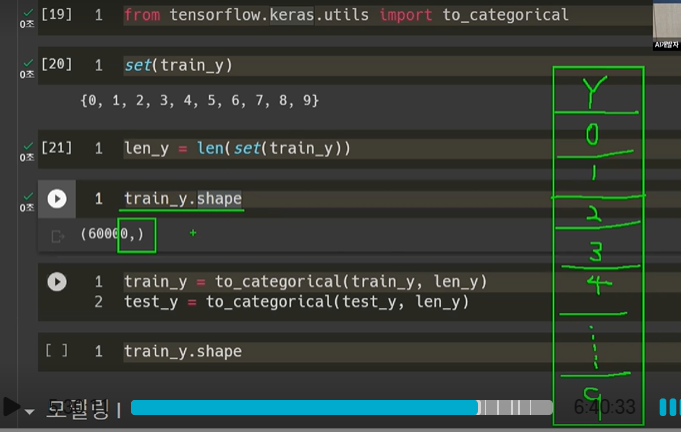

In [37]:
train_y = to_categorical(train_y, len_y) # 트레인 와이의 클래스가 몇 개 있는지... 사실 len_y가 없어도 되는데 전처리 규칙 지킬 거 다 지키면서 깐깐하게 해보자
test_y = to_categorical(test_y, len_y)

In [38]:
train_y.shape # 반복 실행 시키고 확인해 보면 10개의 y값을 가진다는 거...

(60000, 10)

## 모델링 I

1. Sequential, Functional 아무 것이나!
2. 히든레이어 없이 epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [39]:
train_x.shape, train_y.shape # 784개의 인풋레이어와 19개의 아웃풋레이어로 이루어진 단순

((60000, 784), (60000, 10))

In [43]:
## Sequential API
# 1. 세션 클리어
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 레이어 조립
# model.add(keras.layers.Input(shape=(784,)) )
model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(10, activation='softmax') )
# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam') # 다중분류라 카테고리컬 크로스엔트로피
# 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


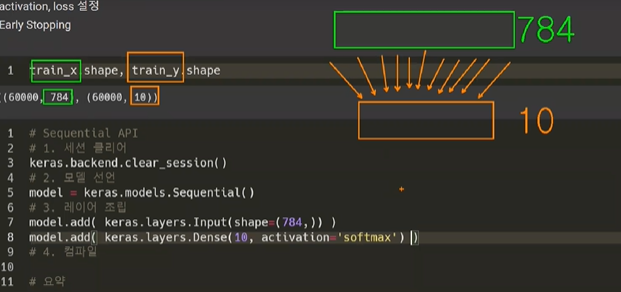

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
# 이름에서 유추되듯이 조금 빠르게 멈출 수 있는 것 >> 뭐를?
# 학습되는 과정에서 과적합 되는 것을 방지하는 용도에서 사용되는 것

In [45]:
es = EarlyStopping(monitor='val_loss',  # 관측 대상 > 밸리데이션 로스를 관측대상으로 삼는다. 지금부터 쓸것이고 핏하는 과정에서 쉽게 적용할 수 있음
                   min_delta=0,         # Threshold > 밸리데이션 로스가 최소한 우리가 지정한 값만큼 낮아져야 그것을 학습이 됐다고 볼 거야. 근데 0은 최소한 나빠지지만 않으면 괜찮다라는 의미. >> 어디까지나 밸리데이션 로스이기 때문에 낮아진다는 것에 기준을 두고 있는 것임. 혹시나 accuracy 같은 경우엔 일정 정도 이상 올라가야 학습이 되었다고 판단함.
                   patience=5,          # 성능 개선되지 않더라도 몇 번 참을래? 
                   verbose=1,           # 얼리스톱핑이 어디서 적용되는지 알려주는 옵션
                   restore_best_weights=True) # 가장 성능이 좋았던 epochs의 가중치를 쓸래, default가 false임. 모니터가 가장 낮았던 그때로 되돌려줌.

In [46]:
# EarlyStopping을 어떻게 쓰느냐? 
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es], # 트레이닝셋을 쓰기로 했잖아... 거기서 자체적으로 20% 분할해서 쓰겠다는 의미
          verbose=1, epochs=50) # callbacks에 들어갈 항목은 다양하기 때문에 리스트 형태로 넣어주는 것이고, 추후에 얼리스톱핑 말고도 넣어줄 것들이 더 있긴 함(시각지능 선생님과)

Epoch 1/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5083 - accuracy: 0.8694 - val_loss: 0.3231 - val_accuracy: 0.9104
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3173 - accuracy: 0.9118 - val_loss: 0.2877 - val_accuracy: 0.9208
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2929 - accuracy: 0.9181 - val_loss: 0.2740 - val_accuracy: 0.9236
Epoch 4/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2814 - accuracy: 0.9211 - val_loss: 0.2720 - val_accuracy: 0.9236
Epoch 5/50
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2735 - accuracy: 0.9231 - val_loss: 0.2692 - val_accuracy: 0.9252
Epoch 6/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2680 - accuracy: 0.9256 - val_loss: 0.2699 - val_accuracy: 0.9256
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2645 - accuracy: 0.9259 - val_loss: 0.2634 - val_accuracy:

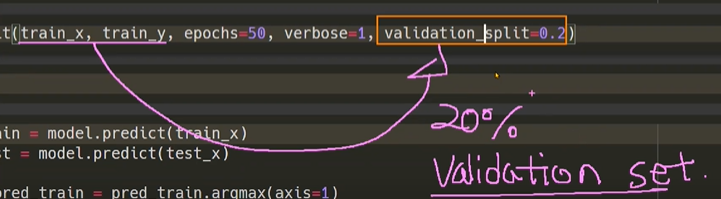

- 로스는 낮을수록 좋죠. 
- 0.1 이라는 값을 줬다. (min_delta) 밸리데이션 로스가 0.1로 떨어져야 학습이 되었다고 판단
- 그렇지 않으면 학습이 안 됐다고 판단함
- 그래서 페이션스하고도 얽히게 되는 것. >> 성능 개선되지 않더라도 몇 번 참을래?

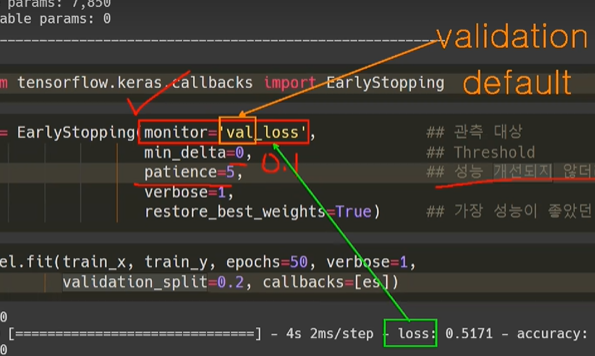

In [47]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

313/313 [==============================] - 1s 2ms/step


In [49]:
pred_train[0] # 10개의 인덱스가 지금 프레드트레인에 첫번째에 있다 이건. 0~9까지인 숫자일 확률 의미

array([1.7046357e-04, 3.0099199e-07, 9.0352038e-04, 1.8655911e-01,
       1.6329571e-07, 8.1201917e-01, 1.2194756e-08, 9.2629067e-05,
       1.9493970e-04, 5.9652135e-05], dtype=float32)

In [50]:
single_pred_train = pred_train.argmax(axis=1) # 축이 두개니까 각 데이터별로 어떤 인덱스를 가르치고 있는지 알려줘. 1번째 데이터들 중에서는 5번째 인덱스가 가장 확률이 높은 것이다. 2번째 데이터들 중에서는 0번째 인덱스가 가장 확률이 높은 것이다.
single_pred_test = pred_test.argmax(axis=1) # argmax는 각 축에서 가장 높은 값을 뽑아주는 것인데
# 배열이 1차원이다 보니까 하나의 인덱스에만 적용하면 요렇게 축이 하나 있어요 그 중에서 가장 확률이 높은 5번째 인덱스 값을 가져온 거야

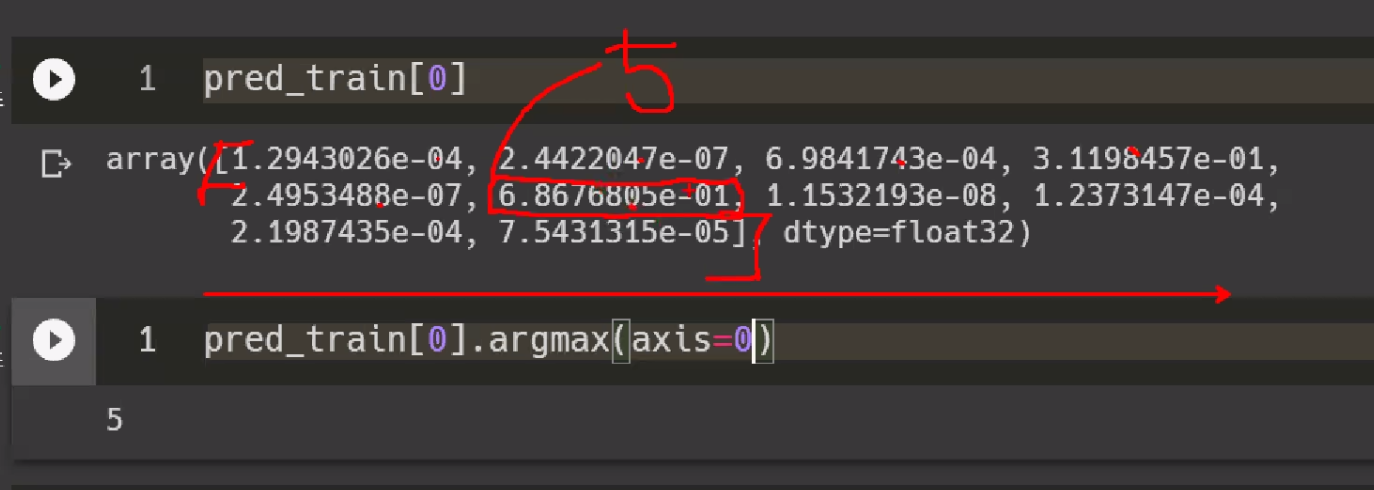

In [51]:
logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train) # 정확도까지 같이 보는 것이다
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

In [52]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 93.22%
테스트 정확도 : 92.68%


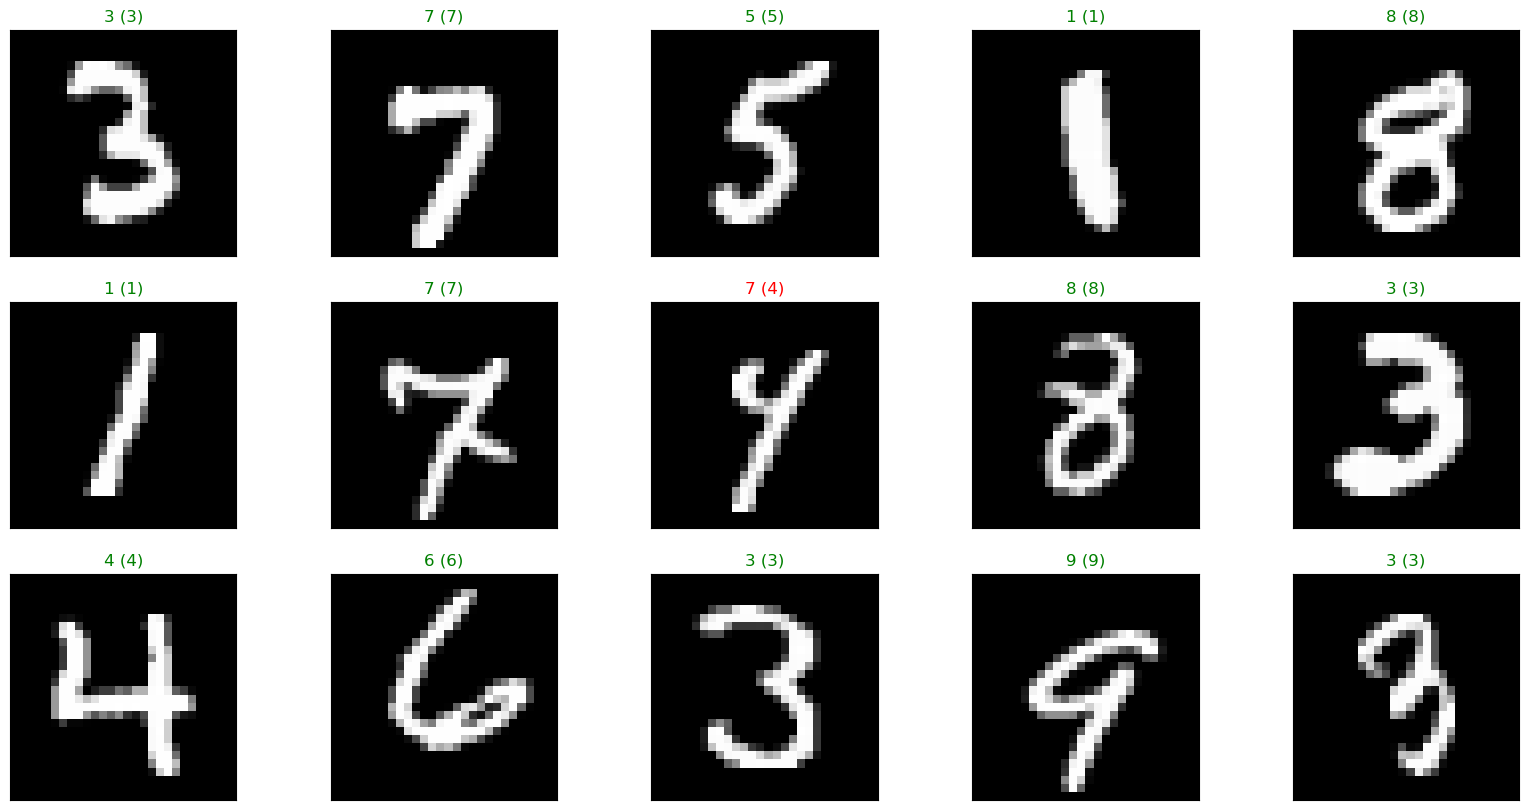

In [53]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

- 왼쪽에 있는 게 정답이고 괄호 안에 있는 게 예측값임
- 정확도가 너무 높아서 틀린 것만 관찰해 볼 필요가 있음

id = 6093
다음 그림은 숫자 2 입니다.
모델의 예측 : 8
모델의 카테고리별 확률 : [ 0.  0. 33.  0.  0.  0.  0.  0. 66.  0.]
틀렸어요


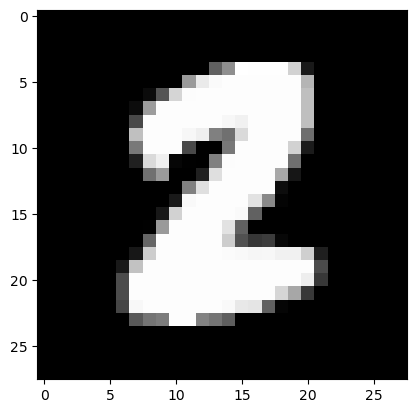

In [54]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

- 누가 봐도 2인데 8이라고 예측했다는 건 다른 시사점이 존재한다는 말이 아닌가?

In [55]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.2662 - accuracy: 0.9268


[0.2662149667739868, 0.926800012588501]



---



## 모델링 II

1. Sequential, Functional 아무 것이나!
2. 히든레이어 3개 이상 쌓고, epochs=50 으로 성능 관찰.
3. activation, loss 설정
4. Early Stopping

In [56]:
train_x.shape, train_y.shape

((60000, 784), (60000, 10))

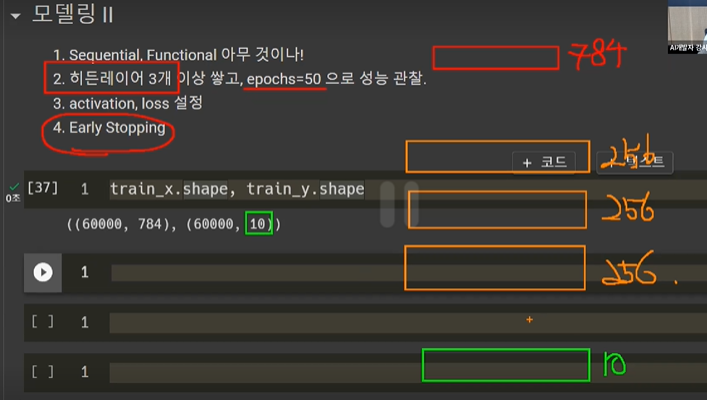

In [57]:
### Sequential API
# 1. 클리어 세션
keras.backend.clear_session()
# 2. 모델 선언
model = keras.models.Sequential()
# 3. 레이어 조립
model.add(keras.layers.Input(shape=(train_x.shape[1])) )
model.add(keras.layers.Dense(256, activation='relu') ) # 256으로 해 주는 의미가 있나요? 별 의미가 없는데 근데 보통 2의 제곱수(2, 4, 8, 16, 256 ...)로 해 주는 것이 관습적으로 좋다고 해요.
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(256, activation='relu') )
model.add(keras.layers.Dense(10, activation='softmax') )
# 4. 컴파일
model.compile(loss=keras.losses.categorical_crossentropy, metrics=['accuracy'],
               optimizer='adam')
# 4. 양념
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 10)                2570      
                                                                 
Total params: 335,114
Trainable params: 335,114
Non-trainable params: 0
_________________________________________________________________


In [58]:
# Early Stopping
from tensorflow.keras.callbacks import EarlyStopping

In [59]:
es = EarlyStopping(monitor='val_loss',        # 빠르게 멈출 관측 대상을 찾는 것
                   min_delta=0,               # Threshold 만약 0.1값을 줬다면 0.1 보다 낮아져야 개선되었다고 인지함으로 그렇지 않으면 개선되지 않았다고 인지하는데, 0이면 변하지 않더라도 성능이 개선됐다고 볼 거야~ 라는 의미임. 
                   patience=5,                # 그것을 여기서 설정한 페이션스 값으로 깎아먹겠다. 모델 성능이 개선되지 않으면 몇 번 참을래?
                   verbose=1,
                   restore_best_weights=True) # 가장 성능이 좋았던 시점의 가중치를 가져올래! , 디폴트가 왜 폴스인지 모르겠는데 반드시 트루로 바꿔줘야 해 

In [60]:
model.fit(train_x, train_y, validation_split=0.2, callbacks=[es],
          verbose=1, epochs=50)
# 파라미터가 많아서 느려지는 것

Epoch 1/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2256 - accuracy: 0.9296 - val_loss: 0.1375 - val_accuracy: 0.9598
Epoch 2/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0983 - accuracy: 0.9697 - val_loss: 0.1133 - val_accuracy: 0.9672
Epoch 3/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0675 - accuracy: 0.9791 - val_loss: 0.1061 - val_accuracy: 0.9703
Epoch 4/50
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0544 - accuracy: 0.9830 - val_loss: 0.0940 - val_accuracy: 0.9725
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0402 - accuracy: 0.9869 - val_loss: 0.1022 - val_accuracy: 0.9742
Epoch 6/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0370 - accuracy: 0.9882 - val_loss: 0.0964 - val_accuracy: 0.9755
Epoch 7/50
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0335 - accuracy: 0.9890 - val_loss: 0.1003 - val_accuracy

In [62]:
pred_train = model.predict(train_x)
pred_test = model.predict(test_x)

single_pred_train = pred_train.argmax(axis=1)
single_pred_test = pred_test.argmax(axis=1)

logi_train_accuracy = accuracy_score(train_y.argmax(axis=1), single_pred_train)
logi_test_accuracy = accuracy_score(test_y.argmax(axis=1), single_pred_test)

print('트레이닝 정확도 : {:.2f}%'.format(logi_train_accuracy*100))
print('테스트 정확도 : {:.2f}%'.format(logi_test_accuracy*100))

313/313 [==============================] - 1s 2ms/step
트레이닝 정확도 : 98.67%
테스트 정확도 : 97.82%


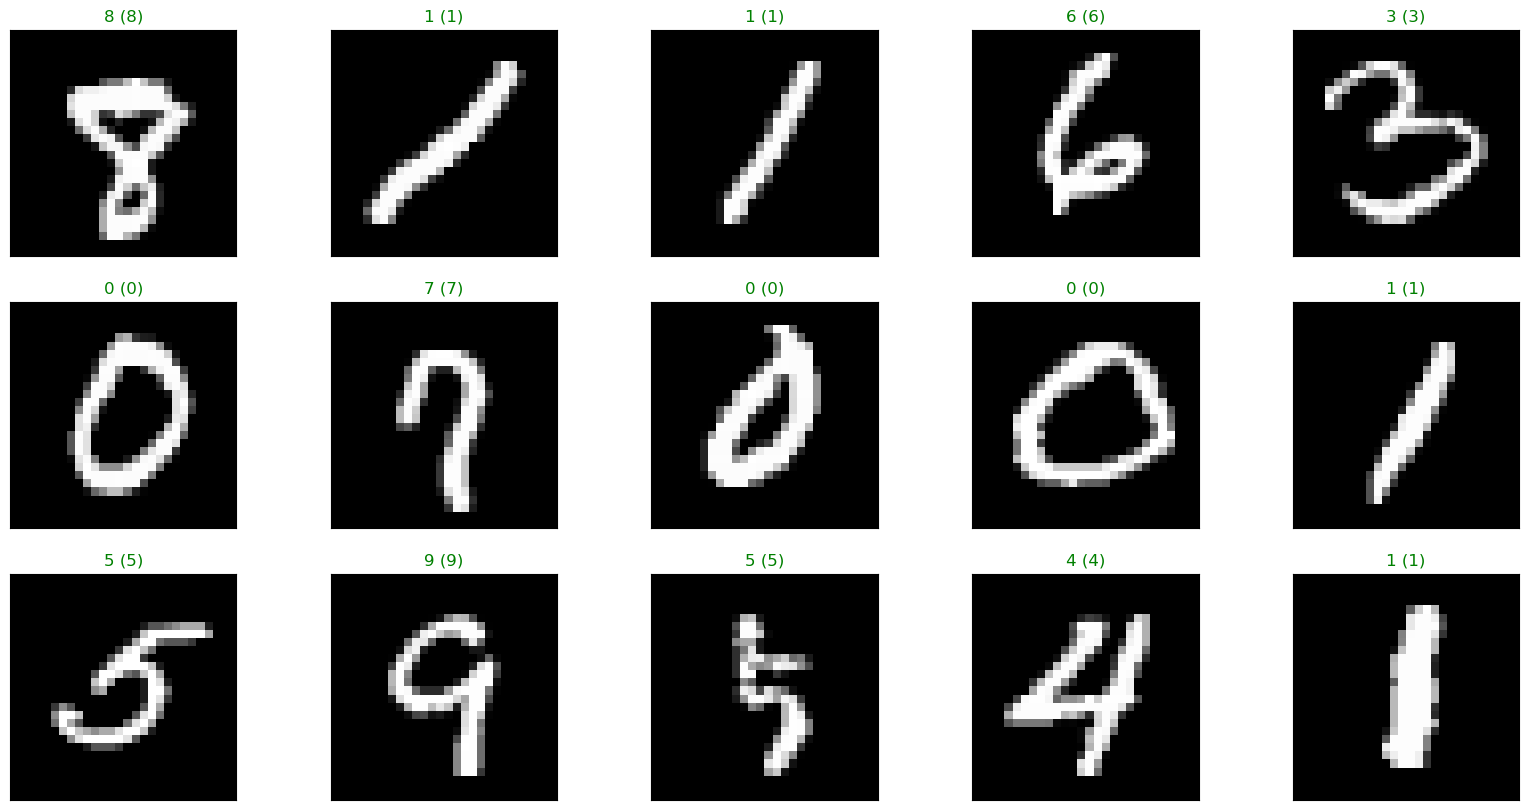

In [63]:
mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

figure = plt.figure(figsize=(20, 10))

for i, index in enumerate(np.random.choice(test_x.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(test_x[index].reshape([28,-1])), cmap='gray' )
    
    predict_index = pred_test[index].argmax(axis=0)
    true_index = test_y[index].argmax(axis=0)
    # Set the title for each image
    ax.set_title(f"{mnist_labels[predict_index]} ({mnist_labels[true_index]})",
                 color=("green" if predict_index == true_index else "red"))

id = 9808
다음 그림은 숫자 9 입니다.
모델의 예측 : 4
모델의 카테고리별 확률 : [ 0.  0.  0.  0. 98.  0.  0.  0.  0.  0.]
틀렸어요


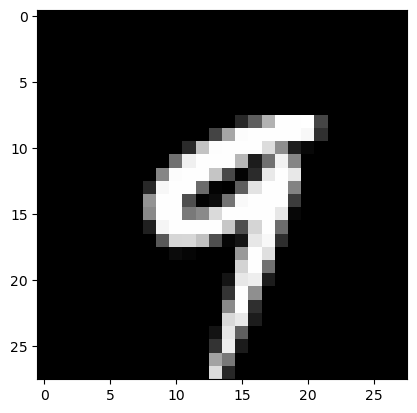

In [64]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (test_y.argmax(axis=1) == single_pred_test)
f_id = np.where(true_false == False)[0]
f_n = len(f_id)

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}' )
print(f'다음 그림은 숫자 {test_y.argmax(axis=1)[id]} 입니다.')
print(f'모델의 예측 : {single_pred_test[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(pred_test[id]*100)}')

if test_y.argmax(axis=1)[id] == single_pred_test[id] :
    print('===============')
    print('정답입니다')
    print('===============')
else : 
    print('===============')
    print('틀렸어요')
    print('===============')

plt.imshow(test_x[id].reshape([28,-1]), cmap='gray')
plt.show()

In [65]:
model.evaluate(test_x, test_y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9782


[0.07316718250513077, 0.9782000184059143]